# 1. Install Ultralytics Library

In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.10.19
    Uninstalling nvidia-curand-cu12-10.3

# 2. Import YOLO and Load Pretrained Model

In [ ]:
from ultralytics import YOLO

# Load a pretrained YOLOv11s segmentation model
model = YOLO("yolo11s-seg.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 19.7M/19.7M [00:00<00:00, 151MB/s]


# 3. Train the Model with Early Stopping

In [ ]:
train_results = model.train(
    data="/kaggle/input/brats-instance-seg/data.yaml",  # Path to dataset YAML file
    epochs=200,                  # Number of epochs for training
    imgsz=640,                   # Input image size
    batch=16,                    # Batch size (adjust if needed based on GPU memory)
    lr0=0.002,                   # Lower learning rate for stability
    optimizer="SGD",             # Using SGD optimizer
    patience=30,                 # Enabling Early stopping if no improvement for 30 epochs
    mosaic=0.0,                  # Disabling mosaic augmentation (not suitable for medical data)
    cache=True,                  # Cache dataset in memory for faster training
    workers=4                    # Using 4 dataloader workers for faster data loading
)

Ultralytics 8.3.156 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/brats-instance-seg/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.002, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s-seg.pt, momentum=0.937, mosaic=0.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=30, perspective=0.0, plots=True, pose

100%|██████████| 755k/755k [00:00<00:00, 15.6MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 68.6MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.3±0.5 ms, read: 4.0±0.6 MB/s, size: 26.5 KB)


train: Scanning /kaggle/input/brats-instance-seg/train/labels... 6435 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6435/6435 [00:42<00:00, 151.57it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/brats-instance-seg/train is not writeable, cache not saved.
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (7.4GB RAM): 100%|██████████| 6435/6435 [00:12<00:00, 525.74it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4.1±0.9 MB/s, size: 26.5 KB)


val: Scanning /kaggle/input/brats-instance-seg/valid/labels... 613 images, 0 backgrounds, 0 corrupt: 100%|██████████| 613/613 [00:04<00:00, 146.41it/s]


WARNING ⚠️ val: Cache directory /kaggle/input/brats-instance-seg/valid is not writeable, cache not saved.
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.7GB RAM): 100%|██████████| 613/613 [00:01<00:00, 495.29it/s]


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: SGD(lr=0.002, momentum=0.937) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/200      4.74G      1.366      2.395      3.408      1.404          3        640: 100%|██████████| 403/403 [02:30<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.51it/s]


                   all        613        613      0.412      0.515      0.426      0.284      0.416      0.517       0.43      0.276

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/200      5.96G      1.158      1.849      1.479      1.154          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.57it/s]

                   all        613        613      0.625      0.638      0.664      0.444       0.63      0.642      0.667      0.414



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/200         6G      1.108      1.743      1.201      1.101          3        640: 100%|██████████| 403/403 [02:27<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.57it/s]

                   all        613        613      0.588      0.683      0.658      0.422      0.585      0.678      0.649      0.397



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/200      6.03G      1.098       1.69      1.092       1.08          3        640: 100%|██████████| 403/403 [02:27<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]

                   all        613        613      0.707      0.641      0.723      0.479      0.711      0.644      0.727      0.459



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/200      6.04G      1.049      1.614     0.9532      1.058          3        640: 100%|██████████| 403/403 [02:26<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.63it/s]

                   all        613        613      0.681      0.688      0.725      0.487       0.68      0.684      0.721      0.467



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/200      6.08G      1.023      1.547     0.8482      1.042          3        640: 100%|██████████| 403/403 [02:27<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.62it/s]

                   all        613        613       0.74       0.68      0.758      0.512      0.726      0.698      0.761      0.494



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/200      6.11G     0.9839      1.496     0.7874      1.022          3        640: 100%|██████████| 403/403 [02:26<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.63it/s]

                   all        613        613       0.77       0.66      0.768      0.516      0.776      0.668      0.772       0.49



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/200      6.14G     0.9496      1.431     0.7191     0.9969          3        640: 100%|██████████| 403/403 [02:27<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.60it/s]

                   all        613        613      0.751      0.736      0.811      0.547      0.782      0.728      0.811      0.523



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/200      6.16G      0.916      1.391     0.6668     0.9812          3        640: 100%|██████████| 403/403 [02:27<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.57it/s]

                   all        613        613       0.78       0.71      0.794      0.545      0.773      0.704      0.786      0.524



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/200       6.2G     0.8973      1.352     0.6215     0.9659          3        640: 100%|██████████| 403/403 [02:27<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.57it/s]

                   all        613        613      0.789      0.705      0.813      0.548      0.796      0.711      0.818      0.528



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/200      6.23G     0.8681      1.315     0.5779     0.9592          3        640: 100%|██████████| 403/403 [02:27<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.55it/s]

                   all        613        613      0.727      0.735      0.773      0.516       0.73      0.736      0.777      0.504



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/200      6.26G     0.8441      1.289     0.5536     0.9487          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.51it/s]

                   all        613        613       0.78      0.755      0.815      0.554      0.787      0.761      0.822      0.541



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/200      6.28G     0.8218      1.253     0.5214     0.9381          3        640: 100%|██████████| 403/403 [02:27<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.61it/s]

                   all        613        613      0.829      0.711      0.812      0.562       0.84      0.722      0.822      0.545



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/200      6.32G     0.7982      1.217     0.5151     0.9271          3        640: 100%|██████████| 403/403 [02:27<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.63it/s]

                   all        613        613      0.775      0.733      0.803      0.549      0.777      0.733      0.805      0.528



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/200      6.34G     0.7861      1.193     0.4876     0.9189          3        640: 100%|██████████| 403/403 [02:27<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.65it/s]

                   all        613        613      0.805      0.764      0.832      0.567       0.81      0.755      0.829      0.551



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/200      6.37G     0.7606      1.182     0.4596     0.9139          3        640: 100%|██████████| 403/403 [02:27<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.63it/s]

                   all        613        613      0.781      0.773      0.819      0.554      0.785      0.777      0.818      0.541



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/200      6.39G      0.758      1.166     0.4511      0.913          3        640: 100%|██████████| 403/403 [02:26<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.62it/s]

                   all        613        613      0.792      0.736      0.816      0.565      0.805      0.744      0.825       0.55



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/200      6.43G     0.7352       1.14     0.4334     0.8971          3        640: 100%|██████████| 403/403 [02:27<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.61it/s]

                   all        613        613      0.831      0.765       0.85      0.586      0.829      0.761      0.844      0.561



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/200      6.46G     0.7212      1.118     0.4279     0.8985          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.57it/s]

                   all        613        613      0.769      0.798      0.838      0.575      0.775      0.804      0.839      0.558



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/200      6.49G     0.7036      1.093     0.4158     0.8888          3        640: 100%|██████████| 403/403 [02:27<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.63it/s]

                   all        613        613      0.837       0.76      0.841      0.565      0.842      0.766      0.844       0.55



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/200      6.51G     0.6891      1.073     0.3963     0.8857          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.62it/s]

                   all        613        613      0.817      0.747      0.817      0.567       0.82       0.75       0.82       0.55



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/200      6.55G     0.6831       1.06      0.389     0.8823          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.63it/s]

                   all        613        613      0.795      0.737      0.818      0.566      0.798       0.74      0.818      0.546



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/200      6.58G     0.6749      1.044      0.388     0.8795          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.65it/s]

                   all        613        613      0.814      0.749      0.827      0.576      0.822      0.757      0.834      0.555



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/200      6.61G     0.6548      1.024     0.3768     0.8666          3        640: 100%|██████████| 403/403 [02:27<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.61it/s]

                   all        613        613      0.834      0.749      0.822      0.566      0.849      0.744      0.826       0.55



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/200      6.63G     0.6464      1.012     0.3703      0.866          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.62it/s]

                   all        613        613      0.825      0.768      0.854      0.596      0.827      0.779      0.851      0.575



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/200      6.66G     0.6338      1.004     0.3616     0.8643          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.61it/s]

                   all        613        613      0.831       0.76      0.836       0.58      0.829      0.764      0.833      0.563



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/200      6.69G     0.6234     0.9819     0.3557     0.8629          3        640: 100%|██████████| 403/403 [02:27<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.60it/s]

                   all        613        613      0.775      0.796      0.845      0.585      0.775      0.796      0.841      0.559



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/200      6.72G     0.6157     0.9634     0.3486      0.856          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.64it/s]

                   all        613        613      0.838      0.781      0.853      0.603      0.841      0.786      0.854      0.582



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/200      6.74G     0.6027     0.9558     0.3392     0.8548          3        640: 100%|██████████| 403/403 [02:27<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.67it/s]

                   all        613        613      0.781      0.818      0.837      0.582      0.786      0.813      0.839      0.566



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/200      6.78G     0.5986     0.9453     0.3422     0.8512          3        640: 100%|██████████| 403/403 [02:27<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.65it/s]

                   all        613        613      0.824      0.784      0.833      0.582       0.82       0.78      0.829      0.563



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/200      6.81G     0.5882     0.9255     0.3312     0.8443          3        640: 100%|██████████| 403/403 [02:27<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.65it/s]

                   all        613        613      0.831      0.762      0.845      0.587      0.845      0.761      0.847      0.568



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/200      6.84G     0.5745     0.9142     0.3285     0.8441          3        640: 100%|██████████| 403/403 [02:27<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.61it/s]

                   all        613        613      0.799      0.805      0.844      0.592        0.8      0.802      0.843      0.572



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/200      6.86G      0.565     0.9198     0.3259     0.8425          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]

                   all        613        613      0.843      0.777      0.852      0.588      0.847      0.781      0.852       0.57



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/200       6.9G     0.5587     0.8872     0.3217     0.8392          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.57it/s]

                   all        613        613      0.823      0.789      0.853      0.599      0.826      0.792      0.855      0.582



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/200      6.93G     0.5482      0.884     0.3168     0.8352          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.62it/s]

                   all        613        613      0.826       0.79      0.847      0.609      0.829      0.792      0.852      0.584



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/200      6.96G     0.5409     0.8752     0.3048     0.8377          3        640: 100%|██████████| 403/403 [02:27<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.65it/s]

                   all        613        613      0.833      0.778      0.848      0.598      0.839      0.784      0.855      0.576



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/200      6.97G     0.5378     0.8697     0.3008     0.8346          3        640: 100%|██████████| 403/403 [02:27<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.66it/s]

                   all        613        613      0.811      0.795      0.854      0.591      0.837       0.79       0.86      0.578



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/200      7.01G     0.5311     0.8553     0.2981     0.8363          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.65it/s]

                   all        613        613      0.831      0.783      0.851        0.6      0.841      0.791      0.859      0.582



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/200      7.04G     0.5217     0.8467     0.2965     0.8262          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.63it/s]

                   all        613        613      0.818        0.8      0.842      0.589      0.819      0.804      0.843       0.57



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/200      7.07G     0.5135     0.8369     0.2947      0.827          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.63it/s]

                   all        613        613      0.868      0.747       0.87      0.613      0.866      0.751      0.869      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/200      7.09G      0.511     0.8296     0.2943     0.8274          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.63it/s]

                   all        613        613      0.835       0.76      0.836      0.595      0.838      0.763      0.839      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/200      7.13G     0.5015     0.8255     0.2861     0.8257          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.66it/s]

                   all        613        613       0.83      0.816      0.854       0.61      0.831      0.816      0.857      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/200      7.16G      0.497     0.8139      0.285     0.8184          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.61it/s]

                   all        613        613      0.837      0.764      0.841      0.596      0.869      0.753      0.845      0.576



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/200      7.19G     0.4879     0.7997     0.2821     0.8203          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.62it/s]

                   all        613        613      0.789      0.794      0.845        0.6      0.811      0.779      0.847      0.589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/200      7.21G     0.4857     0.8039     0.2805     0.8225          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]

                   all        613        613      0.818      0.802      0.849      0.611      0.819      0.803      0.852      0.588



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/200      7.25G     0.4815     0.7905     0.2785     0.8241          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.63it/s]

                   all        613        613      0.833      0.796      0.851      0.601      0.834      0.797      0.851      0.581



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/200      7.27G     0.4693     0.7765     0.2725      0.813          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.68it/s]

                   all        613        613      0.824      0.787      0.846      0.609      0.851      0.776      0.853      0.583



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/200       7.3G     0.4699     0.7763     0.2699     0.8184          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.61it/s]

                   all        613        613      0.804      0.801      0.851      0.609      0.805      0.801      0.852      0.586



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/200      7.32G     0.4577     0.7611      0.265     0.8105          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.60it/s]

                   all        613        613      0.864      0.779      0.859      0.611      0.855      0.788      0.865      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/200      7.36G     0.4558      0.757     0.2689     0.8135          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.68it/s]

                   all        613        613      0.851      0.791      0.854      0.618      0.845      0.806      0.861      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/200      7.39G     0.4492     0.7479     0.2604     0.8085          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.65it/s]

                   all        613        613      0.835      0.809      0.865      0.614      0.859      0.807      0.874      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/200      5.06G     0.4484     0.7498     0.2612     0.8093          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.63it/s]

                   all        613        613      0.815      0.804      0.851      0.619      0.857      0.785      0.864      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/200      5.06G     0.4435      0.739     0.2581     0.8101          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.55it/s]

                   all        613        613      0.814      0.796      0.852      0.608      0.843      0.787      0.857       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/200      5.06G     0.4432     0.7306     0.2598     0.8111          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.63it/s]

                   all        613        613      0.816      0.791      0.862       0.61       0.83      0.782       0.86      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/200      5.06G     0.4341     0.7245     0.2538     0.8042          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.66it/s]

                   all        613        613      0.846      0.777      0.852      0.613      0.848      0.779      0.851      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/200      5.06G     0.4316     0.7246     0.2525     0.8071          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.63it/s]

                   all        613        613      0.866      0.767      0.861      0.618      0.863      0.767      0.856      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/200      5.06G     0.4241     0.7151     0.2537     0.8023          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.64it/s]

                   all        613        613      0.805      0.818      0.865      0.617      0.852      0.787      0.866      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/200      5.06G     0.4245     0.7062     0.2491     0.8032          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.64it/s]

                   all        613        613      0.831      0.798      0.868      0.625      0.835      0.802      0.871      0.602



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/200      5.06G     0.4202     0.7032     0.2444     0.8037          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.66it/s]

                   all        613        613      0.843       0.77      0.855      0.614      0.845      0.771      0.856      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/200      5.06G     0.4134     0.6985     0.2433     0.8037          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.63it/s]

                   all        613        613      0.861      0.798      0.858      0.617      0.871      0.808      0.867      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/200      5.06G     0.4132     0.6925     0.2428     0.8028          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.65it/s]

                   all        613        613      0.851      0.778      0.854      0.615      0.858      0.785      0.861      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/200      5.06G     0.4099     0.6869     0.2406     0.8028          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.67it/s]

                   all        613        613       0.83      0.777      0.855      0.616      0.857      0.766      0.858      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/200      5.09G     0.4048     0.6873     0.2415     0.8012          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.67it/s]

                   all        613        613      0.812      0.813       0.86      0.622      0.808      0.809      0.858      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/200      5.12G      0.396     0.6734     0.2332     0.7977          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.69it/s]

                   all        613        613      0.845      0.789       0.86      0.622      0.869      0.772      0.858        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/200      5.14G     0.3992     0.6659     0.2343     0.7963          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.61it/s]

                   all        613        613      0.865      0.778      0.865      0.629      0.869      0.781      0.869      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/200      5.18G     0.3914     0.6657     0.2332     0.7958          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.70it/s]

                   all        613        613      0.848      0.791      0.863      0.622      0.854      0.796      0.871      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/200      5.21G     0.3881     0.6591     0.2322     0.7952          3        640: 100%|██████████| 403/403 [02:27<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.69it/s]

                   all        613        613       0.86      0.762      0.853      0.621      0.866      0.767      0.857      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/200      5.24G     0.3867     0.6604     0.2302     0.7953          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.64it/s]

                   all        613        613      0.825      0.803      0.858      0.621      0.836      0.796       0.86      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/200      5.26G     0.3866     0.6536     0.2286     0.7958          3        640: 100%|██████████| 403/403 [02:27<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.67it/s]

                   all        613        613      0.863      0.752      0.857      0.627       0.88      0.766      0.872      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/200      5.29G     0.3837     0.6492     0.2293     0.7938          3        640: 100%|██████████| 403/403 [02:27<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.63it/s]

                   all        613        613      0.835      0.796      0.866      0.621      0.842      0.803      0.872      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/200      5.32G     0.3816     0.6481     0.2278     0.7987          3        640: 100%|██████████| 403/403 [02:27<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.72it/s]

                   all        613        613      0.881      0.774      0.867      0.624      0.836      0.818      0.867      0.602



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/200      5.35G     0.3751     0.6394     0.2262     0.7962          3        640: 100%|██████████| 403/403 [02:27<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.72it/s]

                   all        613        613      0.828      0.803      0.865      0.625      0.831      0.806      0.865        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/200      5.37G     0.3745     0.6377     0.2254     0.7915          3        640: 100%|██████████| 403/403 [02:27<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.65it/s]

                   all        613        613      0.846      0.789      0.863       0.63      0.852      0.794      0.869      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/200      5.41G     0.3659     0.6274     0.2176     0.7912          3        640: 100%|██████████| 403/403 [02:27<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.72it/s]

                   all        613        613      0.851      0.785      0.866      0.633       0.86      0.791      0.871      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/200      5.44G     0.3634     0.6245     0.2186     0.7943          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.61it/s]

                   all        613        613       0.88      0.799      0.873      0.634      0.886      0.804      0.879      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/200      5.47G     0.3649     0.6179     0.2215     0.7893          3        640: 100%|██████████| 403/403 [02:27<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.70it/s]

                   all        613        613      0.874      0.788      0.871      0.632      0.899      0.774      0.877      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/200      5.49G     0.3595     0.6105     0.2175     0.7905          3        640: 100%|██████████| 403/403 [02:29<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.50it/s]

                   all        613        613      0.879      0.769      0.876      0.638      0.887      0.776      0.882      0.616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/200      5.53G     0.3569       0.61      0.215     0.7898          3        640: 100%|██████████| 403/403 [02:29<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]

                   all        613        613      0.878       0.78      0.874       0.63       0.85      0.821      0.881      0.611



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/200      5.55G     0.3534     0.6117     0.2159     0.7881          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.69it/s]

                   all        613        613      0.846      0.804      0.877      0.631       0.85      0.808      0.881      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/200      5.58G     0.3479     0.6025     0.2111     0.7907          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.70it/s]

                   all        613        613      0.878      0.782      0.868      0.631      0.886      0.787       0.88      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/200      5.61G     0.3477     0.6013     0.2106     0.7881          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.68it/s]

                   all        613        613      0.863      0.784      0.868      0.628      0.871      0.791      0.874      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/200      5.64G     0.3463     0.5971     0.2125     0.7904          3        640: 100%|██████████| 403/403 [02:29<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.67it/s]

                   all        613        613      0.865      0.781      0.868      0.626      0.869      0.781      0.872      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/200      5.67G     0.3437     0.5866     0.2102     0.7906          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.70it/s]

                   all        613        613      0.836      0.824      0.876      0.631       0.84      0.826      0.881      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/200      5.73G     0.3436     0.5895     0.2087     0.7888          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.64it/s]

                   all        613        613      0.872       0.81      0.869      0.629      0.879      0.815      0.879      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/200      5.75G     0.3368     0.5867     0.2046     0.7863          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.65it/s]

                   all        613        613      0.856      0.808      0.865      0.626      0.862      0.818      0.873      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/200      5.79G     0.3373     0.5845     0.2069     0.7843          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.68it/s]

                   all        613        613      0.818      0.823      0.869      0.633      0.822       0.83      0.873      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/200      5.82G     0.3309     0.5811     0.2033     0.7847          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.65it/s]

                   all        613        613      0.855      0.782       0.87      0.634       0.87      0.782      0.876       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/200      5.88G      0.333     0.5787     0.2047     0.7851          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.68it/s]

                   all        613        613      0.883      0.783      0.875      0.642       0.89      0.789      0.881      0.616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/200       5.9G      0.327     0.5676     0.1996     0.7842          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.62it/s]

                   all        613        613      0.879      0.791      0.869      0.638      0.887      0.798       0.88      0.616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/200      5.97G     0.3237     0.5659     0.2029     0.7859          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.68it/s]

                   all        613        613      0.878      0.788      0.864      0.636      0.882      0.792      0.873      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/200         6G     0.3253     0.5635     0.1999      0.784          3        640: 100%|██████████| 403/403 [02:29<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.53it/s]

                   all        613        613      0.861      0.806       0.87      0.635      0.864      0.808      0.877      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/200      6.03G     0.3271      0.567     0.2033     0.7884          3        640: 100%|██████████| 403/403 [02:30<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.60it/s]

                   all        613        613      0.856      0.816      0.874      0.639      0.873        0.8       0.88      0.616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/200      6.09G     0.3191     0.5578     0.1983     0.7831          3        640: 100%|██████████| 403/403 [02:30<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.50it/s]

                   all        613        613      0.848      0.827      0.878      0.646      0.853      0.832      0.887      0.622



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/200      6.12G     0.3182     0.5508     0.1967     0.7828          3        640: 100%|██████████| 403/403 [02:29<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.60it/s]

                   all        613        613      0.848      0.816      0.876      0.642      0.868      0.812      0.885       0.62



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/200      6.15G     0.3157     0.5522      0.198     0.7833          3        640: 100%|██████████| 403/403 [02:30<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.55it/s]

                   all        613        613      0.863      0.805      0.876      0.637      0.869       0.81      0.883      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/200      6.18G     0.3154      0.547     0.1983     0.7829          3        640: 100%|██████████| 403/403 [02:31<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.61it/s]

                   all        613        613      0.841      0.823       0.88      0.639      0.852      0.832      0.887      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/200       6.2G     0.3106     0.5434     0.1955     0.7812          3        640: 100%|██████████| 403/403 [02:29<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.53it/s]

                   all        613        613      0.854      0.812      0.877      0.641       0.86      0.818      0.885      0.616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/200      6.27G     0.3113      0.544     0.1928     0.7802          3        640: 100%|██████████| 403/403 [02:30<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.53it/s]

                   all        613        613      0.832      0.831      0.877      0.642       0.84      0.838      0.887      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/200      6.34G     0.3065     0.5367     0.1921     0.7806          3        640: 100%|██████████| 403/403 [02:30<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.65it/s]

                   all        613        613      0.847       0.81      0.879      0.643      0.849      0.812      0.883      0.617



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/200      6.37G     0.3045     0.5352     0.1911     0.7823          3        640: 100%|██████████| 403/403 [02:30<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.50it/s]

                   all        613        613      0.824      0.832      0.879      0.639      0.828      0.836      0.886      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/200      6.38G     0.3001     0.5355     0.1877     0.7781          3        640: 100%|██████████| 403/403 [02:31<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]

                   all        613        613      0.869      0.796      0.874      0.638      0.853      0.818      0.884      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/200      6.42G     0.3007     0.5286     0.1913     0.7816          3        640: 100%|██████████| 403/403 [02:30<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.66it/s]

                   all        613        613      0.843      0.821      0.872      0.636      0.846      0.824      0.884      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/200      6.45G     0.2991     0.5274     0.1883     0.7804          3        640: 100%|██████████| 403/403 [02:30<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]

                   all        613        613      0.852      0.813      0.872      0.636      0.854      0.815      0.882       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/200      6.48G     0.2959     0.5254     0.1892     0.7815          3        640: 100%|██████████| 403/403 [02:31<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.57it/s]

                   all        613        613      0.874       0.79      0.877       0.64       0.88      0.796      0.885      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/200      6.54G     0.2954     0.5262      0.188      0.776          3        640: 100%|██████████| 403/403 [02:31<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.50it/s]

                   all        613        613       0.86      0.804      0.874       0.64      0.866      0.809      0.882      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/200      6.57G      0.295      0.519     0.1876     0.7818          3        640: 100%|██████████| 403/403 [02:31<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.58it/s]

                   all        613        613       0.87      0.811      0.877      0.642      0.874      0.815       0.88      0.617



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/200       6.6G     0.2905     0.5139     0.1856     0.7808          3        640: 100%|██████████| 403/403 [02:31<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.61it/s]

                   all        613        613      0.875        0.8       0.88      0.644      0.877      0.802      0.882      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/200      6.66G     0.2885      0.508     0.1827     0.7801          3        640: 100%|██████████| 403/403 [02:29<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.51it/s]

                   all        613        613      0.855      0.817      0.879      0.647       0.86      0.821      0.884       0.62



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/200      6.72G      0.292      0.512     0.1834     0.7775          3        640: 100%|██████████| 403/403 [02:31<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]

                   all        613        613      0.849      0.819      0.877      0.644      0.851      0.821      0.881      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/200      6.76G     0.2846     0.5064     0.1799     0.7784          3        640: 100%|██████████| 403/403 [02:31<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.71it/s]

                   all        613        613      0.827      0.827      0.872       0.64      0.831      0.832      0.881      0.617



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/200      6.79G     0.2857     0.5052     0.1799     0.7774          3        640: 100%|██████████| 403/403 [02:30<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.52it/s]

                   all        613        613      0.849      0.798      0.874      0.638      0.852        0.8      0.881      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/200      6.81G     0.2818     0.5033     0.1782     0.7769          3        640: 100%|██████████| 403/403 [02:31<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.58it/s]

                   all        613        613      0.843        0.8      0.873      0.638      0.849      0.798      0.878      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/200      7.27G     0.2807     0.5047     0.1767     0.7762          3        640: 100%|██████████| 403/403 [02:30<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.66it/s]

                   all        613        613      0.841       0.81       0.87      0.636      0.842      0.811      0.877      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/200       7.3G     0.2777     0.4942     0.1808     0.7784          3        640: 100%|██████████| 403/403 [02:30<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.35it/s]

                   all        613        613      0.865      0.805      0.873      0.637      0.864      0.805      0.876      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/200      7.33G     0.2775     0.4962     0.1766     0.7754          3        640: 100%|██████████| 403/403 [02:30<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]

                   all        613        613      0.857      0.806      0.869      0.637      0.866      0.814       0.88      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/200      7.36G     0.2756     0.4937     0.1766      0.775          3        640: 100%|██████████| 403/403 [02:29<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.57it/s]

                   all        613        613      0.851      0.804      0.871      0.637      0.858      0.811       0.88      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/200      7.38G     0.2755     0.4927     0.1757     0.7744          3        640: 100%|██████████| 403/403 [02:30<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.34it/s]

                   all        613        613      0.858      0.798      0.871      0.638      0.865      0.804       0.88      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/200       5.1G      0.275     0.4895     0.1766     0.7733          3        640: 100%|██████████| 403/403 [02:30<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.62it/s]

                   all        613        613      0.861      0.798      0.874      0.641      0.866      0.804      0.883      0.616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/200       5.1G     0.2723     0.4874     0.1753     0.7773          3        640: 100%|██████████| 403/403 [02:28<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]

                   all        613        613       0.86      0.798      0.873      0.642      0.865      0.802      0.883      0.617



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/200       5.1G     0.2691     0.4834     0.1715     0.7735          3        640: 100%|██████████| 403/403 [02:31<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]

                   all        613        613      0.854        0.8      0.874      0.642      0.866      0.799      0.882      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    121/200       5.1G     0.2711     0.4816     0.1738     0.7744          3        640: 100%|██████████| 403/403 [02:30<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.60it/s]

                   all        613        613      0.862      0.793      0.872      0.642      0.866      0.798       0.88      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    122/200       5.1G     0.2666     0.4794     0.1713     0.7769          3        640: 100%|██████████| 403/403 [02:30<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]

                   all        613        613      0.854        0.8      0.874      0.646       0.86      0.806      0.882       0.62



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    123/200       5.1G     0.2639     0.4757     0.1697     0.7753          3        640: 100%|██████████| 403/403 [02:30<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.60it/s]

                   all        613        613      0.853        0.8      0.876      0.645      0.859      0.806      0.884      0.619
EarlyStopping: Training stopped early as no improvement observed in last 30 epochs. Best results observed at epoch 93, best model saved as best.pt.
To update EarlyStopping(patience=30) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



123 epochs completed in 5.362 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 20.5MB
Optimizer stripped from runs/segment/train/weights/best.pt, 20.5MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.156 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s-seg summary (fused): 113 layers, 10,067,977 parameters, 0 gradients, 35.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.31it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        613        613      0.845      0.826      0.876      0.645      0.849       0.83      0.886      0.622
                Glioma        280        280      0.808      0.797      0.867      0.673      0.812        0.8      0.872      0.661
            Meningioma        148        148      0.827      0.804      0.845      0.575      0.827      0.804      0.857      0.536
             Pituitary        185        185      0.899      0.876      0.916      0.689       0.91      0.886      0.927       0.67
Speed: 0.2ms preprocess, 6.4ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/segment/train


# 4. Evaluate the Model

In [ ]:
# Evaluate the model on the validation set
metrics = model.val()

Ultralytics 8.3.156 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s-seg summary (fused): 113 layers, 10,067,977 parameters, 0 gradients, 35.3 GFLOPs
val: Fast image access ✅ (ping: 3.3±3.1 ms, read: 28.6±4.4 MB/s, size: 33.2 KB)


val: Scanning /kaggle/input/brats-instance-seg/valid/labels... 613 images, 0 backgrounds, 0 corrupt: 100%|██████████| 613/613 [00:01<00:00, 408.56it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/brats-instance-seg/valid is not writeable, cache not saved.


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.7GB RAM): 100%|██████████| 613/613 [00:00<00:00, 637.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:12<00:00,  3.21it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        613        613      0.842      0.826      0.876      0.646       0.85      0.833      0.888      0.621
                Glioma        280        280      0.808      0.796      0.868      0.677      0.811        0.8      0.875      0.659
            Meningioma        148        148      0.821      0.804      0.844      0.573      0.828      0.811      0.861      0.536
             Pituitary        185        185      0.899      0.876      0.916      0.688       0.91      0.886      0.928      0.667
Speed: 0.6ms preprocess, 12.3ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/segment/train2


# 5. Perform Prediction on a Test Image


image 1/1 /kaggle/input/brats-instance-seg/test/images/1004_png.rf.7558975afb3881d25d1e95c4ebae5645.jpg: 640x640 1 Pituitary, 20.2ms
Speed: 2.4ms preprocess, 20.2ms inference, 51.4ms postprocess per image at shape (1, 3, 640, 640)


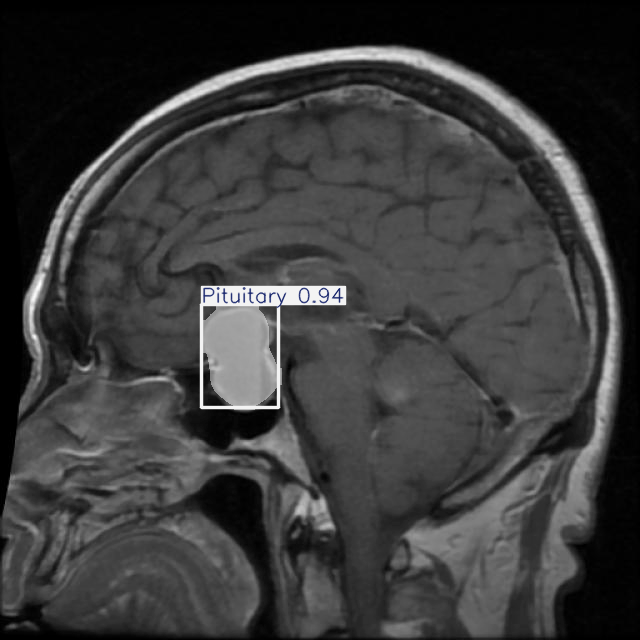

In [ ]:
# Path to a test image
image_path = r"/kaggle/input/brats-instance-seg/test/images/1004_png.rf.7558975afb3881d25d1e95c4ebae5645.jpg"

# Run prediction
results = model(image_path)

# Show prediction results
results[0].show()

# 6. Export the Model to ONNX Format

In [ ]:
# Export the model to ONNX format
path = model.export(format="onnx")  # Returns the path to the exported ONNX model

Ultralytics 8.3.156 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel CPUs. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from 'runs/segment/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 39, 8400), (1, 32, 160, 160)) (19.6 MB)
requirements: Ultralytics requirements ['onnxslim>=0.1.56', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 4.9s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.57...
ONNX: export success ✅ 8.9s, saved as 'runs/segment/train/weights/best.onnx' (38.7 MB)

Export complete (9.8s)
Results saved to /kaggle/working/runs/segment/train/weights
Predict:         yolo predict task=segment model=runs/segment/train/weights/best.onnx imgsz=640  
Validate:      